The FEV, which is an acronym for forced expiratory volume, is a measure of how much air a person can exhale (in litres) during a forced breath. In this dataset, the FEV of 606 children, between the ages of 6 and 17, were measured. The dataset also provides additional information on these children: their age, their height, their gender and, most importantly, whether the child is a smoker or a non-smoker.

### Initially we will try to understand the relations between each element by building different models:

#### Model 1: 
        Fitting the Linear Model for FEV on SMOKE, FEV on AGE, FEV on HT and FEV on GENDER and based on Rsquare values we will
        draw conclusions.
        



### For now, we can already assess other (less complex) research questions:

1. Is there a linear association between the FEV and the height of non-smoking females?

2. Is there a linear association between the FEV and the age of non-smoking females?

3. Is there a linear association between the FEV and the height of non-smoking males?

4. Is there a linear association between the FEV and the age of non-smoking males?


### For each of these short research questions, you should:

1. Check the assumptions of the linear model, and analyse the data accordingly.

2. Interpret the output, focusing on the interpretation of the intercept and the slope parameters of the model.

3. Formulate a conclusion for each research hypothesis.

Ref for research paper
https://www.tandfonline.com/doi/full/10.1080/10691898.2005.11910559

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

## Import Data

In [2]:
df= pd.read_csv('fev.txt', usecols=['AGE', 'FEV', 'HEIGHT','SEX', 'SMOKE'])
df.head()

AGE    FEV  HEIGHT  SEX  SMOKE
0    9  1.708    57.0    2      2
1    8  1.724    67.5    2      2
2    7  1.720    54.5    2      2
3    9  1.558    53.0    1      2
4    9  1.895    57.0    1      2

In [4]:
df.describe()

AGE         FEV      HEIGHT         SEX       SMOKE
count  654.000000  654.000000  654.000000  654.000000  654.000000
mean     9.931193    2.636780   61.143578    1.486239    1.900612
std      2.953935    0.867059    5.703513    0.500193    0.299412
min      3.000000    0.791000   46.000000    1.000000    1.000000
25%      8.000000    1.981000   57.000000    1.000000    2.000000
50%     10.000000    2.547500   61.500000    1.000000    2.000000
75%     12.000000    3.118500   65.500000    2.000000    2.000000
max     19.000000    5.793000   74.000000    2.000000    2.000000

0.28 ---- 4.81


Both gender and smkoing can be transformed to factors.
we can create a new column 'HEICHT_CM', since inches are hard to interprate

In [33]:
df['SMOKE'] = df['SMOKE'].replace({2:0})
df['SEX'] = df['SEX'].replace({2:0})
df['HEIGHT_CM']= df['HEIGHT'] * 2.54
df

AGE    FEV  HEIGHT  SEX  SMOKE  HEIGHT_CM
0      9  1.708    57.0    0      0     144.78
1      8  1.724    67.5    0      0     171.45
2      7  1.720    54.5    0      0     138.43
3      9  1.558    53.0    1      0     134.62
4      9  1.895    57.0    1      0     144.78
..   ...    ...     ...  ...    ...        ...
649   16  4.270    67.0    1      1     170.18
650   15  3.727    68.0    1      1     172.72
651   18  2.853    60.0    0      0     152.40
652   16  2.795    63.0    0      1     160.02
653   15  3.211    66.5    0      0     168.91

[654 rows x 6 columns]

## Data Exploration

First we will plot a boxplot showing only FEV for both smoking categories

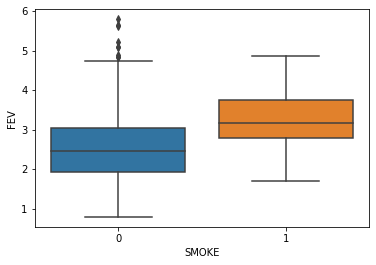

In [32]:
sns.boxplot(x='SMOKE', y='FEV', data=df)

The about plot suggests that FEV among smokers is relatively hight median than those who do not smoke. Maybe something else is going on on the data. We will stratif the data based on age.

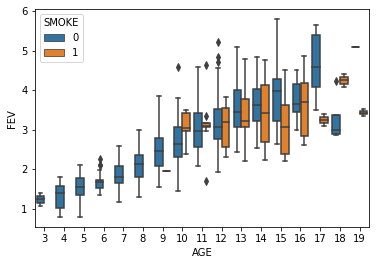

In [27]:
sns.boxplot(x='AGE', y='FEV',hue='SMOKE', data=df)

This plot makes gives a clear understanding. We donot have any smoking children of age 6,7,8. Analysing the result as per age category, it seems no longer the case thatsmokers have high FEV compared to non smokers. For the higher ages, the contrary seems true.

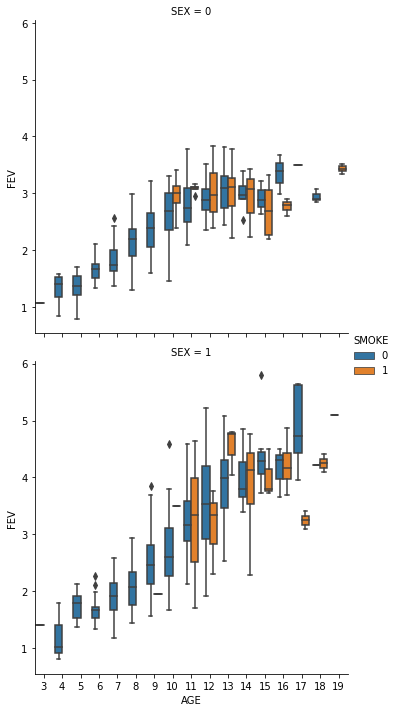

In [38]:
sns.catplot(x='AGE', y='FEV',row='SEX', hue='SMOKE', data=df, kind='box')

This plot helps us with extra information by adding the gender. FEV is higher for males as compared to females.

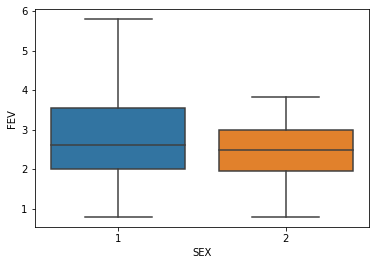

In [5]:
sns.boxplot(x='SEX', y='FEV', data=df)

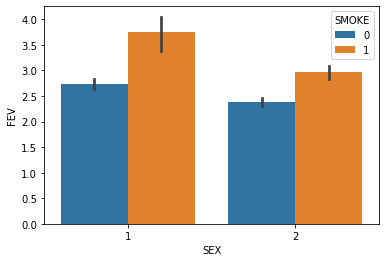

In [6]:
sns.barplot(x='SEX', y='FEV', data=df, hue='SMOKE')

In [7]:
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})

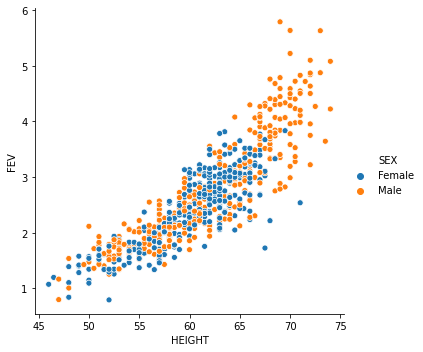

In [8]:
sns.relplot(x='HEIGHT', y='FEV', hue='SEX', data=df)

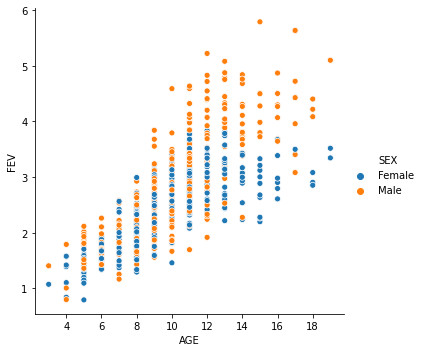

In [9]:
sns.relplot(x='AGE', y='FEV', hue='SEX', data=df)

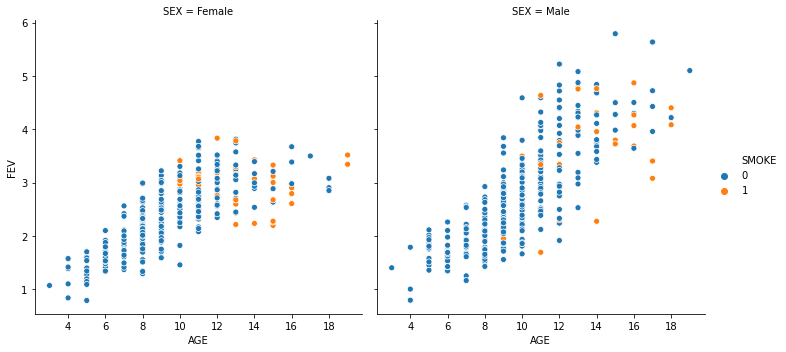

In [10]:
sns.relplot(x='AGE', y='FEV', hue='SMOKE', col='SEX' ,data=df)

In [11]:
df['SMOKE'].value_counts()

0    589
1     65
Name: SMOKE, dtype: int64

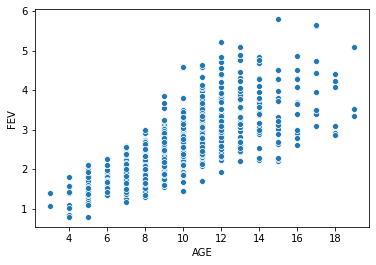

In [12]:
sns.scatterplot(x='AGE', y='FEV', data=df)

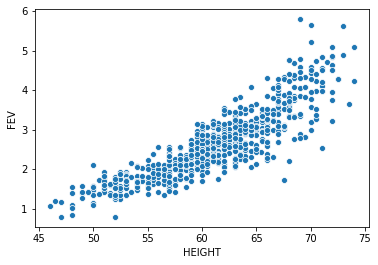

In [13]:
sns.scatterplot(x='HEIGHT', y='FEV', data=df)

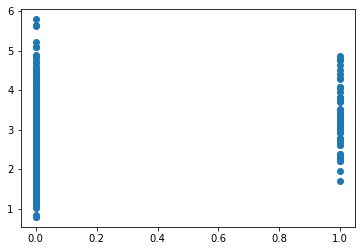

In [14]:
X = df['SMOKE']# values converts it into a numpy array
y = df['FEV'] 
plt.scatter(X,y)
plt.show()

In [15]:
df['SEX'] = df['SEX'].replace({'Male' : 1, 'Female': 0})

In [16]:
df

AGE    FEV  HEIGHT  SEX  SMOKE
0      9  1.708    57.0    0      0
1      8  1.724    67.5    0      0
2      7  1.720    54.5    0      0
3      9  1.558    53.0    1      0
4      9  1.895    57.0    1      0
..   ...    ...     ...  ...    ...
649   16  4.270    67.0    1      1
650   15  3.727    68.0    1      1
651   18  2.853    60.0    0      0
652   16  2.795    63.0    0      1
653   15  3.211    66.5    0      0

[654 rows x 5 columns]

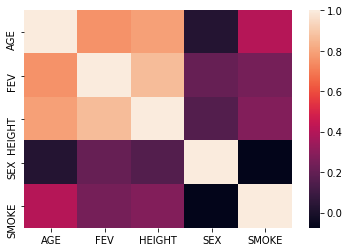

In [17]:
sns.heatmap(df.corr())

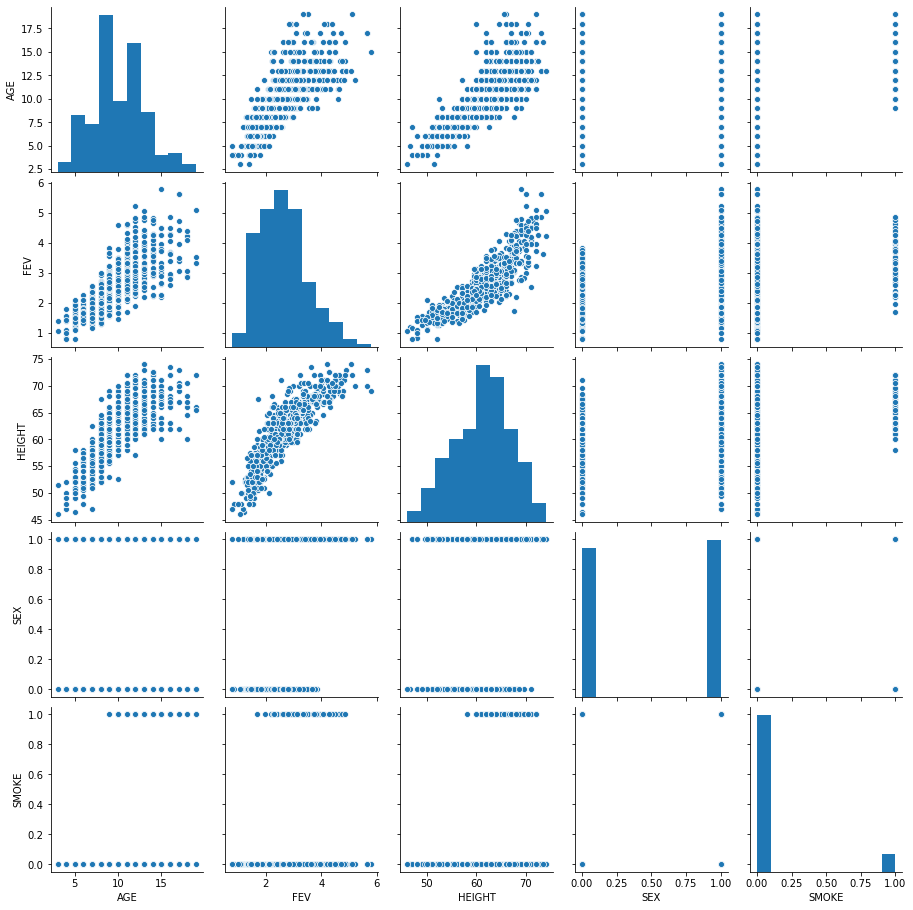

In [18]:
sns.pairplot(df)

In [ ]:
# Smoking status vs fev
# 